In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotting
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [2]:
TRAIN_DATA = pd.read_csv('train-balanced-sarcasm.csv')
TRAIN_DATA.head()
TRAIN_DATA = TRAIN_DATA.drop(["author","subreddit","score","ups","downs","date","created_utc","parent_comment"], axis=1)
TRAIN_DATA.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.


In [3]:
TRAIN_DATA.info()
# Delete data entries that are missing a comment
TRAIN_DATA.dropna(subset=['comment'], inplace=True)
TRAIN_DATA.info()

# Check if dataset is still balanced
print("\n Check balance of dataset after deletion")
TRAIN_DATA['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   label    1010826 non-null  int64 
 1   comment  1010773 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   label    1010773 non-null  int64 
 1   comment  1010773 non-null  object
dtypes: int64(1), object(1)
memory usage: 23.1+ MB

 Check balance of dataset after deletion


0    505405
1    505368
Name: label, dtype: int64

In [4]:
train_data, test_data = \
        train_test_split(TRAIN_DATA, random_state=42)
train_data, valid_data = \
        train_test_split(train_data, random_state=42)

In [5]:
print("Balance of Train Data\n{}".format(train_data['label'].value_counts()))

print("\nBalance of Cross-Validation Data\n{}".format(valid_data['label'].value_counts()))

print("\nBalance of Test Data\n{}".format(test_data['label'].value_counts()))


Balance of Train Data
0    284587
1    283972
Name: label, dtype: int64

Balance of Cross-Validation Data
0    94772
1    94748
Name: label, dtype: int64

Balance of Test Data
1    126648
0    126046
Name: label, dtype: int64


In [6]:
from wordcloud import STOPWORDS
from collections import defaultdict
import string # for punctuation

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token.strip(string.punctuation) # remove leading/trailing punctuation
             for token in text.lower().split(" ") # for words in text; lower cased
             if token.strip(string.punctuation) != "" if token not in STOPWORDS] # except empty and stop words
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [7]:
# Unigrams
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in TRAIN_DATA[TRAIN_DATA["label"]==0]["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(30), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in TRAIN_DATA[TRAIN_DATA["label"]==1]["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of sincere comments", 
                                          "Frequent words of sarcasm comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

C:\Users\Extra\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [8]:
# BIGRAMS
freq_dict = defaultdict(int)
for sent in TRAIN_DATA[TRAIN_DATA["label"]==0]["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(30), 'orange')


freq_dict = defaultdict(int)
for sent in TRAIN_DATA[TRAIN_DATA["label"]==1]["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Frequent bigrams of sincere comments", 
                                          "Frequent bigrams of sarcasm comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')



C:\Users\Extra\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [9]:
# TRIGRAMS
freq_dict = defaultdict(int)
for sent in TRAIN_DATA[TRAIN_DATA["label"]==0]["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(30), 'red')


freq_dict = defaultdict(int)
for sent in TRAIN_DATA[TRAIN_DATA["label"]==1]["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.35,
                          subplot_titles=["Frequent bigrams of sincere comments", 
                                          "Frequent bigrams of sarcasm comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

C:\Users\Extra\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [10]:
#imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [11]:
%%time
# build bigrams, put a limit on maximal number of features
# and minimal word frequency
tf_idf = TfidfVectorizer(ngram_range=(1, 3),  # unigrams and bigrams
                         max_features=50000, 
                         min_df=2) # inogre a feature if it is encounter only 2 times or less
# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(C=1, #inverse regularization strength; smaller -> higher reguralization
                           n_jobs=-1, # parallelize
                           solver='lbfgs', 
                           random_state=17, # for shuffling the data
                           verbose=1) 
# sklearn's pipeline
# Sequentially apply transforms and a final estimator.
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)] # Steps
                               )

tfidf_logit_pipeline

CPU times: total: 0 ns
Wall time: 0 ns


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 3))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

In [12]:
%%time
## Train
# Fit all the transforms one after the other and transform the data,
# then fit the transformed data using the final estimator.
tfidf_logit_pipeline.fit(train_data["comment"], # training data
                         train_data["label"]) # labels

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.2s finished


CPU times: total: 38.6 s
Wall time: 52.9 s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 3))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

In [13]:
%%time

## test
valid_pred = tfidf_logit_pipeline.predict(valid_data["comment"])
## accuracy score - fraction of correct ones
print("Accuracy on Valid Data")
accuracy_score(valid_data["label"], valid_pred)

Accuracy on Valid Data
CPU times: total: 5.62 s
Wall time: 5.84 s


0.7186048965808358

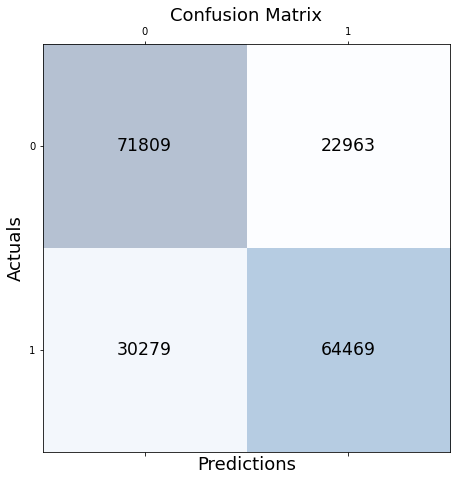

In [15]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=valid_data["label"], y_pred=valid_pred, )

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [16]:
precision_recall_fscore_support(y_true=valid_data["label"], y_pred=valid_pred, average='binary')

(0.7373616067343765, 0.6804259720521805, 0.7077505763530574, None)

In [17]:
!pip install vaderSentiment

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return negative, neutral, positive, compound, overall_sentiment

In [20]:
%%time
data_Sarcasm = train_data[train_data["label"]==1]
data_NonSarcasm = train_data[train_data["label"]==0]

correct_Sarc = len(data_Sarcasm)
average = 0
sarcScores = []
sarcComments = []
for data in data_Sarcasm["comment"][:10000]:
    ne, nu, po, co, ov = sentiment_vader(data)
    average += co
    sarcScores.append(co)
    sarcComments.append(data)
average /= (correct_Sarc)
print(average, correct_Sarc)


correct_Sarc = len(data_NonSarcasm)
average = 0
nonSarcScores = []
nonSarcComments = []
for data in data_NonSarcasm["comment"][:10000]:
    ne, nu, po, co, ov = sentiment_vader(data)
    average += co
    nonSarcScores.append(co)
    nonSarcComments.append(data)
average /= (correct_Sarc)
print(average, correct_Sarc)
    

0.0022423657966278367 283972
0.0020579766468601882 284587
Wall time: 8min 30s


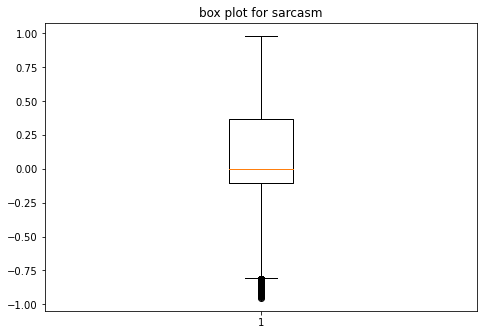

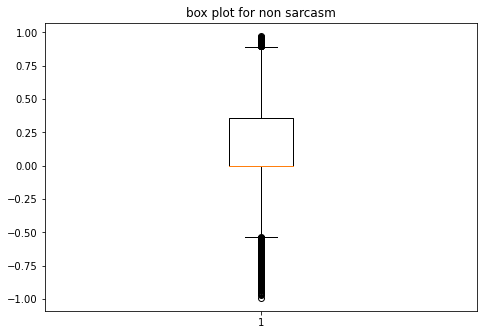

In [21]:
fig1 = plt.figure()
fig2 = plt.figure()
# Create an axes instance
ax1 = fig1.add_axes([0,0,1,1])
ax2 = fig2.add_axes([0,0,1,1])
# Create the boxplot
ax1.set_title('box plot for sarcasm')
bp1 = ax1.boxplot(sarcScores)
ax2.set_title('box plot for non sarcasm')
bp2 = ax2.boxplot(nonSarcScores)
plt.show()

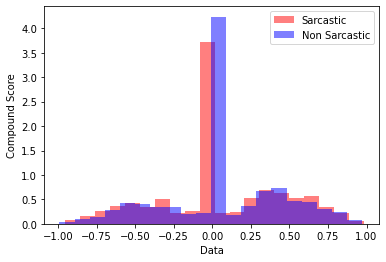

In [22]:
plt.hist(sarcScores, density=True, bins=20, alpha=0.5,label="Sarcastic", color="r") 
plt.hist(nonSarcScores, density=True, bins=20, alpha=0.5,label="Non Sarcastic", color="b")
plt.legend(loc='upper right') 
plt.ylabel('Compound Score')
plt.xlabel('Data');

In [23]:
%%time
## Train with reduced datasize
tfidf_logit_pipeline.fit(train_data["comment"][:10000], # training data
                         train_data["label"][:10000]) # labels

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished


Wall time: 7.21 s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 3))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

In [24]:
%%time

## test
valid_pred = tfidf_logit_pipeline.predict(valid_data["comment"])
## accuracy score - fraction of correct ones
print("Accuracy of smaller modell on Valid Data")
accuracy_score(valid_data["label"], valid_pred)

Accuracy of smaller modell on Valid Data
Wall time: 7.31 s


0.650955044322499

In [25]:
# New Pipeline
tf_idf = TfidfVectorizer(ngram_range=(1, 2),
                         max_features=50000, 
                         min_df=2) 

# create Transformer now allowing the new field sentiment to pass through
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tf_idf',tf_idf,'comment'),
],remainder='passthrough', n_jobs=-1)

logit = LogisticRegression(C=1,
                           n_jobs=-1,
                           solver='lbfgs', 
                           random_state=17,
                           verbose=1) 

tfidf_logit_pipeline = Pipeline([('transformer', transformer), 
                                 ('logit', logit)] # Steps
                               )

tfidf_logit_pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('tf_idf',
                                                  TfidfVectorizer(max_features=50000,
                                                                  min_df=2,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'comment')])),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

In [26]:
%%time


train_data_senti = train_data[:10000]
temp_sentiment = []
for data in train_data_senti["comment"]:
    _, _, _, score, _ = sentiment_vader(data)
    temp_sentiment.append(score)
    
train_data_senti["sentiment"] = temp_sentiment   
## Train
tfidf_logit_pipeline.fit(train_data_senti, # training data
                         train_data["label"][:10000]) # labels

<timed exec>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


Wall time: 4min 5s


Pipeline(steps=[('transformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('tf_idf',
                                                  TfidfVectorizer(max_features=50000,
                                                                  min_df=2,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'comment')])),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

In [29]:
train_data_senti.head()

,label,comment,sentiment
963641,0,"yeah, that's a real dealbreaker that one.",0.2960
850455,1,Welcome to my lineup Jags DST.,0.4588
850721,1,but we've had such good luck with italians in ...,0.8459
972160,1,"But if he's constantly exercising, he can't be...",0.0000
823881,1,If you oppose the Patriot Act you're not a pat...,0.0000


In [31]:
%%time

train_data_senti = train_data_senti[:10000]
temp_sentiment = []
for data in train_data_senti["comment"]:
    _, _, _, score, _ = sentiment_vader(data)
    temp_sentiment.append(score)
    
train_data_senti["sentiment"] = temp_sentiment

## test
valid_pred = tfidf_logit_pipeline.predict(train_data_senti)
## accuracy score - fraction of correct ones
accuracy_score(valid_data["label"][:10000], valid_pred)

Wall time: 4min 52s


0.4983

In [37]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [39]:
%%time

# build bigrams, put a limit on maximal number of features
# and minimal word frequency
tf_idf = TfidfVectorizer(ngram_range=(1, 2),  # unigrams and bigrams
                         max_features=50000, 
                         min_df=2) # inogre a feature if it is encounter only 2 times or less

#create Transformer
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
transformer = ColumnTransformer(transformers=[
    ('tf_idf',tf_idf,'comment'),
    ('TargetEncoder',TargetEncoder(),['sentiment']),
],remainder='passthrough', n_jobs=-1)

# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(C=1, #inverse regularization strength; smaller -> higher reguralization
                           n_jobs=-1, # parallelize
                           solver='lbfgs', 
                           random_state=17, # for shuffling the data
                           verbose=1) 
# sklearn's pipeline
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods.
#The final estimator only needs to implement fit.
tfidf_logit_pipeline = Pipeline([('transformer', transformer), 
                                 ('logit', logit)] # Steps
                               )

tfidf_logit_pipeline

Wall time: 997 µs


Pipeline(steps=[('transformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('tf_idf',
                                                  TfidfVectorizer(max_features=50000,
                                                                  min_df=2,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'comment'),
                                                 ('TargetEncoder',
                                                  TargetEncoder(),
                                                  ['sentiment'])])),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

In [40]:
%%time

train_data_senti = train_data.drop(["label"], axis=1)
train_data_senti = train_data_senti[:10000]
temp_sentiment = []
for data in train_data_senti["comment"]:
    _, _, _, _, sentiment = sentiment_vader(data)
    temp_sentiment.append(sentiment)
    
train_data_senti["sentiment"] = temp_sentiment   
## Train
# Fit all the transforms one after the other and transform the data,
# then fit the transformed data using the final estimator.
tfidf_logit_pipeline.fit(train_data_senti, # training data
                         train_data["label"][:10000]) # labels

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished


Wall time: 3min 53s


Pipeline(steps=[('transformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('tf_idf',
                                                  TfidfVectorizer(max_features=50000,
                                                                  min_df=2,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'comment'),
                                                 ('TargetEncoder',
                                                  TargetEncoder(),
                                                  ['sentiment'])])),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

In [41]:
%%time
valid_data_senti = valid_data.drop(["label"], axis=1)
valid_data_senti = valid_data_senti[:10000]
temp_sentiment = []
for data in valid_data_senti["comment"]:
    _, _, _, _, sentiment = sentiment_vader(data)
    temp_sentiment.append(sentiment)
    
valid_data_senti["sentiment"] = temp_sentiment

## test
valid_pred = tfidf_logit_pipeline.predict(valid_data_senti)
## accuracy score - fraction of correct ones
accuracy_score(valid_data["label"][:10000], valid_pred)

Wall time: 4min 16s


0.6558